# Llava image analysis

- [Model reference](https://llava-vl.github.io/)
- [Ollama model card](https://ollama.com/library/llava)
- [LangChain Ollama example](https://python.langchain.com/v0.1/docs/integrations/llms/ollama/)


In [2]:
! pip install -q -U langchain

In [9]:
import base64
import requests
from io import BytesIO
from IPython.display import HTML,display
from PIL import Image
from langchain_community.llms import Ollama

In [8]:
def convert_to_base64(pil_image):
    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    display(HTML(image_html))




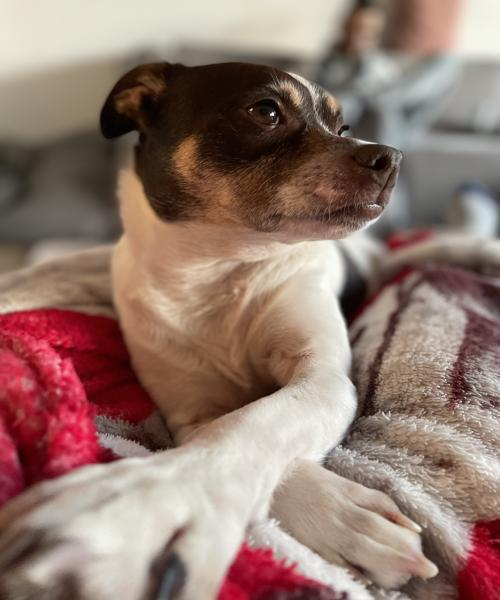

In [14]:
image_url = "https://secure.btech.software/repo/images/pet_21_04_24.jpeg"
image = Image.open(requests.get(image_url, stream=True).raw).resize((500, 600))
image_b64 = convert_to_base64(image)
plt_img_base64(image_b64)

In [17]:
llava = Ollama(model="llava")
llm_with_image_context = llava.bind(images=[image_b64])
response = llm_with_image_context.invoke("Describe this image")

In [18]:
print(response)

 The image shows a small, dark-furred dog sitting on what appears to be a blanket or towel. The dog is looking directly at the camera with its front paws extended outward as if reaching for something or just resting comfortably. The background of the photo is slightly blurred but suggests an indoor setting with soft lighting that casts gentle shadows around the dog's legs. There is no text present in the image. The style of the photograph seems to be a casual, candid shot capturing a moment of calm in the pet's life. 
